In [1]:
# Important: Code is mostly re-used from https://github.com/moduIo/Deep-Q-network/blob/master/DQN.ipynb
# Code may change with more clean-ups and explanation
import gym
from collections import deque
from IPython import display
import matplotlib.pyplot as plt
from dqn_agent import DQN_Agent
from air_raid_utils import process_frame

In [2]:
def show_state(env, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env)
    plt.title("Step: %d %s" % (step, info))
    plt.axis('off')
    display.clear_output(wait=True)
    plt.show()

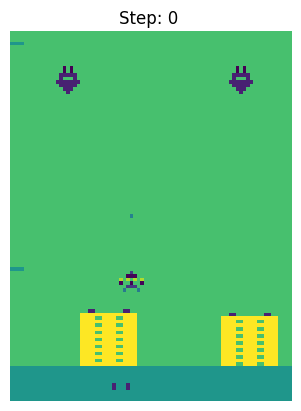

episode: 1/200, game score: 100.0, avg_10: 100.0, reward: 100.0, avg reward: 100.0, time: 402, total time: 403
Saving: models/10k-memory_0-games.weights.h5


In [3]:
env = gym.make('AirRaidDeterministic-v0', render_mode="rgb_array")
state_size = (105, 80, 4)
action_size = env.action_space.n
episodes = 200  # 200
batch_size = 32  # 64
num_steps = 2500
gamma = 0.9
agent = DQN_Agent(env,state_size, action_size,episodes,num_steps,batch_size,gamma)

load_model_name = ""
if load_model_name != "":
    agent.load(load_model_name)

## Visualize state
observation = env.reset()
observation = env.step(1)
for skip in range(2): # skip the start of each game/
    observation = env.step(0)
processed_observation = process_frame(observation[0])
show_state(processed_observation)
agent.train()